In [1]:
import xarray as xr

# Open ERA5 NetCDF datasets
ds_accum = xr.open_dataset("ERA5/data_stream-oper_stepType-accum.nc")
ds_inst = xr.open_dataset("ERA5/data_stream-oper_stepType-instant.nc")


In [2]:
# Subset to Indian subcontinent (adjust slice order if lat is descending)
sub_accum = ds_accum.sel(latitude=slice(38.5, 6.0), longitude=slice(66.0, 100.0))
sub_inst = ds_inst.sel(latitude=slice(38.5, 6.0), longitude=slice(66.0, 100.0))


In [3]:
sub_accum.to_netcdf("ERA5_IndianSubcontinent_accum.nc")
sub_inst.to_netcdf("ERA5_IndianSubcontinent_instant.nc")


In [4]:
print(sub_accum.variables)
print(sub_inst.variables)


Frozen({'number': <xarray.Variable ()> Size: 8B
[1 values with dtype=int64]
Attributes:
    long_name:      ensemble member numerical id
    units:          1
    standard_name:  realization, 'valid_time': <xarray.IndexVariable 'valid_time' (valid_time: 744)> Size: 6kB
array(['2020-10-01T00:00:00.000000000', '2020-10-01T01:00:00.000000000',
       '2020-10-01T02:00:00.000000000', ..., '2020-10-31T21:00:00.000000000',
       '2020-10-31T22:00:00.000000000', '2020-10-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:      time
    standard_name:  time, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 131)> Size: 1kB
array([38.5 , 38.25, 38.  , 37.75, 37.5 , 37.25, 37.  , 36.75, 36.5 , 36.25,
       36.  , 35.75, 35.5 , 35.25, 35.  , 34.75, 34.5 , 34.25, 34.  , 33.75,
       33.5 , 33.25, 33.  , 32.75, 32.5 , 32.25, 32.  , 31.75, 31.5 , 31.25,
       31.  , 30.75, 30.5 , 30.25, 30.  , 29.75, 29.5 , 29.25, 29.  , 28.75,
       28.5 , 28.25, 28.  , 27.7

In [5]:
print(ds_accum.variables)
print(ds_inst.variables)



Frozen({'number': <xarray.Variable ()> Size: 8B
[1 values with dtype=int64]
Attributes:
    long_name:      ensemble member numerical id
    units:          1
    standard_name:  realization, 'valid_time': <xarray.IndexVariable 'valid_time' (valid_time: 744)> Size: 6kB
array(['2020-10-01T00:00:00.000000000', '2020-10-01T01:00:00.000000000',
       '2020-10-01T02:00:00.000000000', ..., '2020-10-31T21:00:00.000000000',
       '2020-10-31T22:00:00.000000000', '2020-10-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:      time
    standard_name:  time, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 137)> Size: 1kB
array([40.  , 39.75, 39.5 , 39.25, 39.  , 38.75, 38.5 , 38.25, 38.  , 37.75,
       37.5 , 37.25, 37.  , 36.75, 36.5 , 36.25, 36.  , 35.75, 35.5 , 35.25,
       35.  , 34.75, 34.5 , 34.25, 34.  , 33.75, 33.5 , 33.25, 33.  , 32.75,
       32.5 , 32.25, 32.  , 31.75, 31.5 , 31.25, 31.  , 30.75, 30.5 , 30.25,
       30.  , 29.75, 29.5 , 29.2

In [6]:
print(list(ds_accum.data_vars))
print(list(ds_inst.data_vars))


['tp', 'cp']
['sp', 'cbh', 'hcc', 'lcc', 'mcc', 'tclw', 'ptype', 'tcrw']


In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load datasets with correct time dimension name
ds_accum = xr.open_dataset("ERA5/data_stream-oper_stepType-accum.nc")
ds_inst = xr.open_dataset("ERA5/data_stream-oper_stepType-instant.nc")

# Define time period
start_date = '2020-10-10'
end_date = '2020-10-15'

# Subset using valid_time dimension
sub_accum = ds_accum.sel(valid_time=slice(start_date, end_date))

# Calculate stratiform rainfall
stratiform = sub_accum['tp'] - sub_accum['cp']

# Sum over valid_time (convert m to mm)
convective_sum = sub_accum['cp'].sum(dim='valid_time') * 1000
stratiform_sum = stratiform.sum(dim='valid_time') * 1000

# Verify coordinate names
print("Dimensions:", sub_accum.dims)  # Should show valid_time, latitude, longitude


Dimensions: FrozenMappingWarningOnValuesAccess({'valid_time': 144, 'latitude': 137, 'longitude': 141})


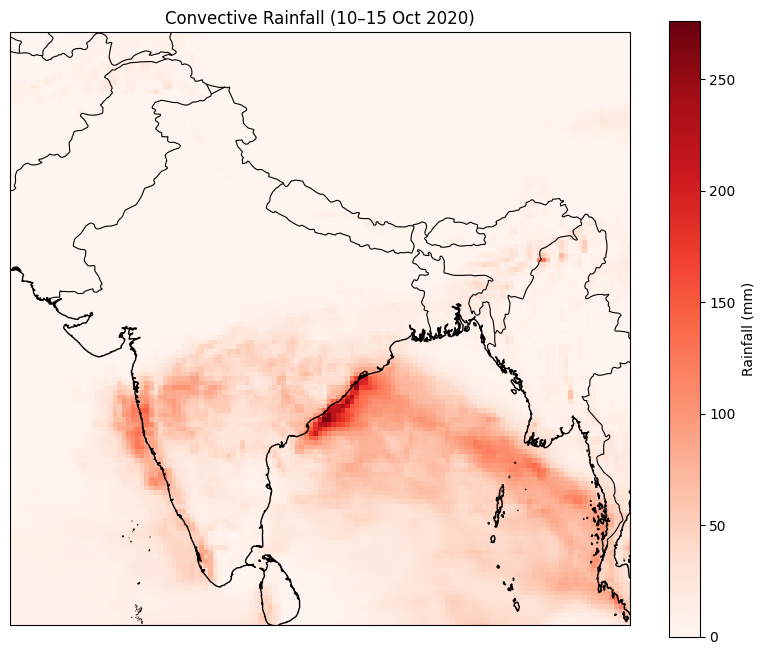

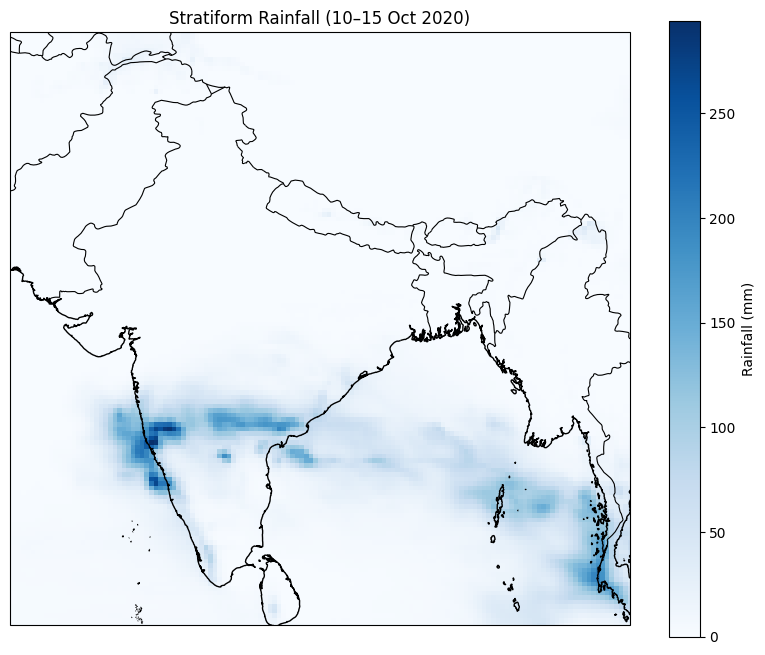

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assume sub_accum, convective_sum, stratiform_sum are already defined as in your workflow

# Define map extent for Indian subcontinent
extent = [66, 100, 6, 38.5]

def plot_rainfall(data, lons, lats, title, cmap):
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linewidth=0.8)
    mesh = ax.pcolormesh(lons, lats, data, cmap=cmap, shading='auto', transform=ccrs.PlateCarree())
    plt.colorbar(mesh, ax=ax, orientation='vertical', label='Rainfall (mm)')
    plt.title(title)
    plt.show()

# Use these coordinate arrays
lons = sub_accum['longitude']
lats = sub_accum['latitude']

# Plot Convective Rainfall
plot_rainfall(convective_sum, lons, lats, 'Convective Rainfall (10–15 Oct 2020)', 'Reds')

# Plot Stratiform Rainfall
plot_rainfall(stratiform_sum, lons, lats, 'Stratiform Rainfall (10–15 Oct 2020)', 'Blues')


In [9]:
import xarray as xr
import numpy as np
import pandas as pd

file_path_accum = "ERA5/data_stream-oper_stepType-accum.nc"
ds_accum = xr.open_dataset(file_path_accum)

# Define time period
start_date = '2020-10-10'
end_date = '2020-10-15'

# Subset accumulated data for the period
sub_accum = ds_accum.sel(valid_time=slice(start_date, end_date))

# Extract unique dates from valid_time
dates = pd.to_datetime(sub_accum.valid_time.values).normalize().unique()

# Prepare daily convective and stratiform rainfall arrays
convective_daily = []
stratiform_daily = []

for date in dates:
    day_data = sub_accum.sel(valid_time=slice(str(date), str(date + np.timedelta64(1, 'D'))))
    conv_sum = day_data['cp'].sum(dim='valid_time') * 1000  # convert to mm
    strat_sum = (day_data['tp'] - day_data['cp']).sum(dim='valid_time') * 1000  # convert to mm
    convective_daily.append(conv_sum)
    stratiform_daily.append(strat_sum)

# Stack daily data into a single xarray DataArray for easier plotting
convective_daily = xr.concat(convective_daily, dim='day')
stratiform_daily = xr.concat(stratiform_daily, dim='day')

# Assign day coordinate as string dates
convective_daily = convective_daily.assign_coords(day=[str(d.date()) for d in dates])
stratiform_daily = stratiform_daily.assign_coords(day=[str(d.date()) for d in dates])

# Extract lat/lon
lats = sub_accum['latitude']
lons = sub_accum['longitude']


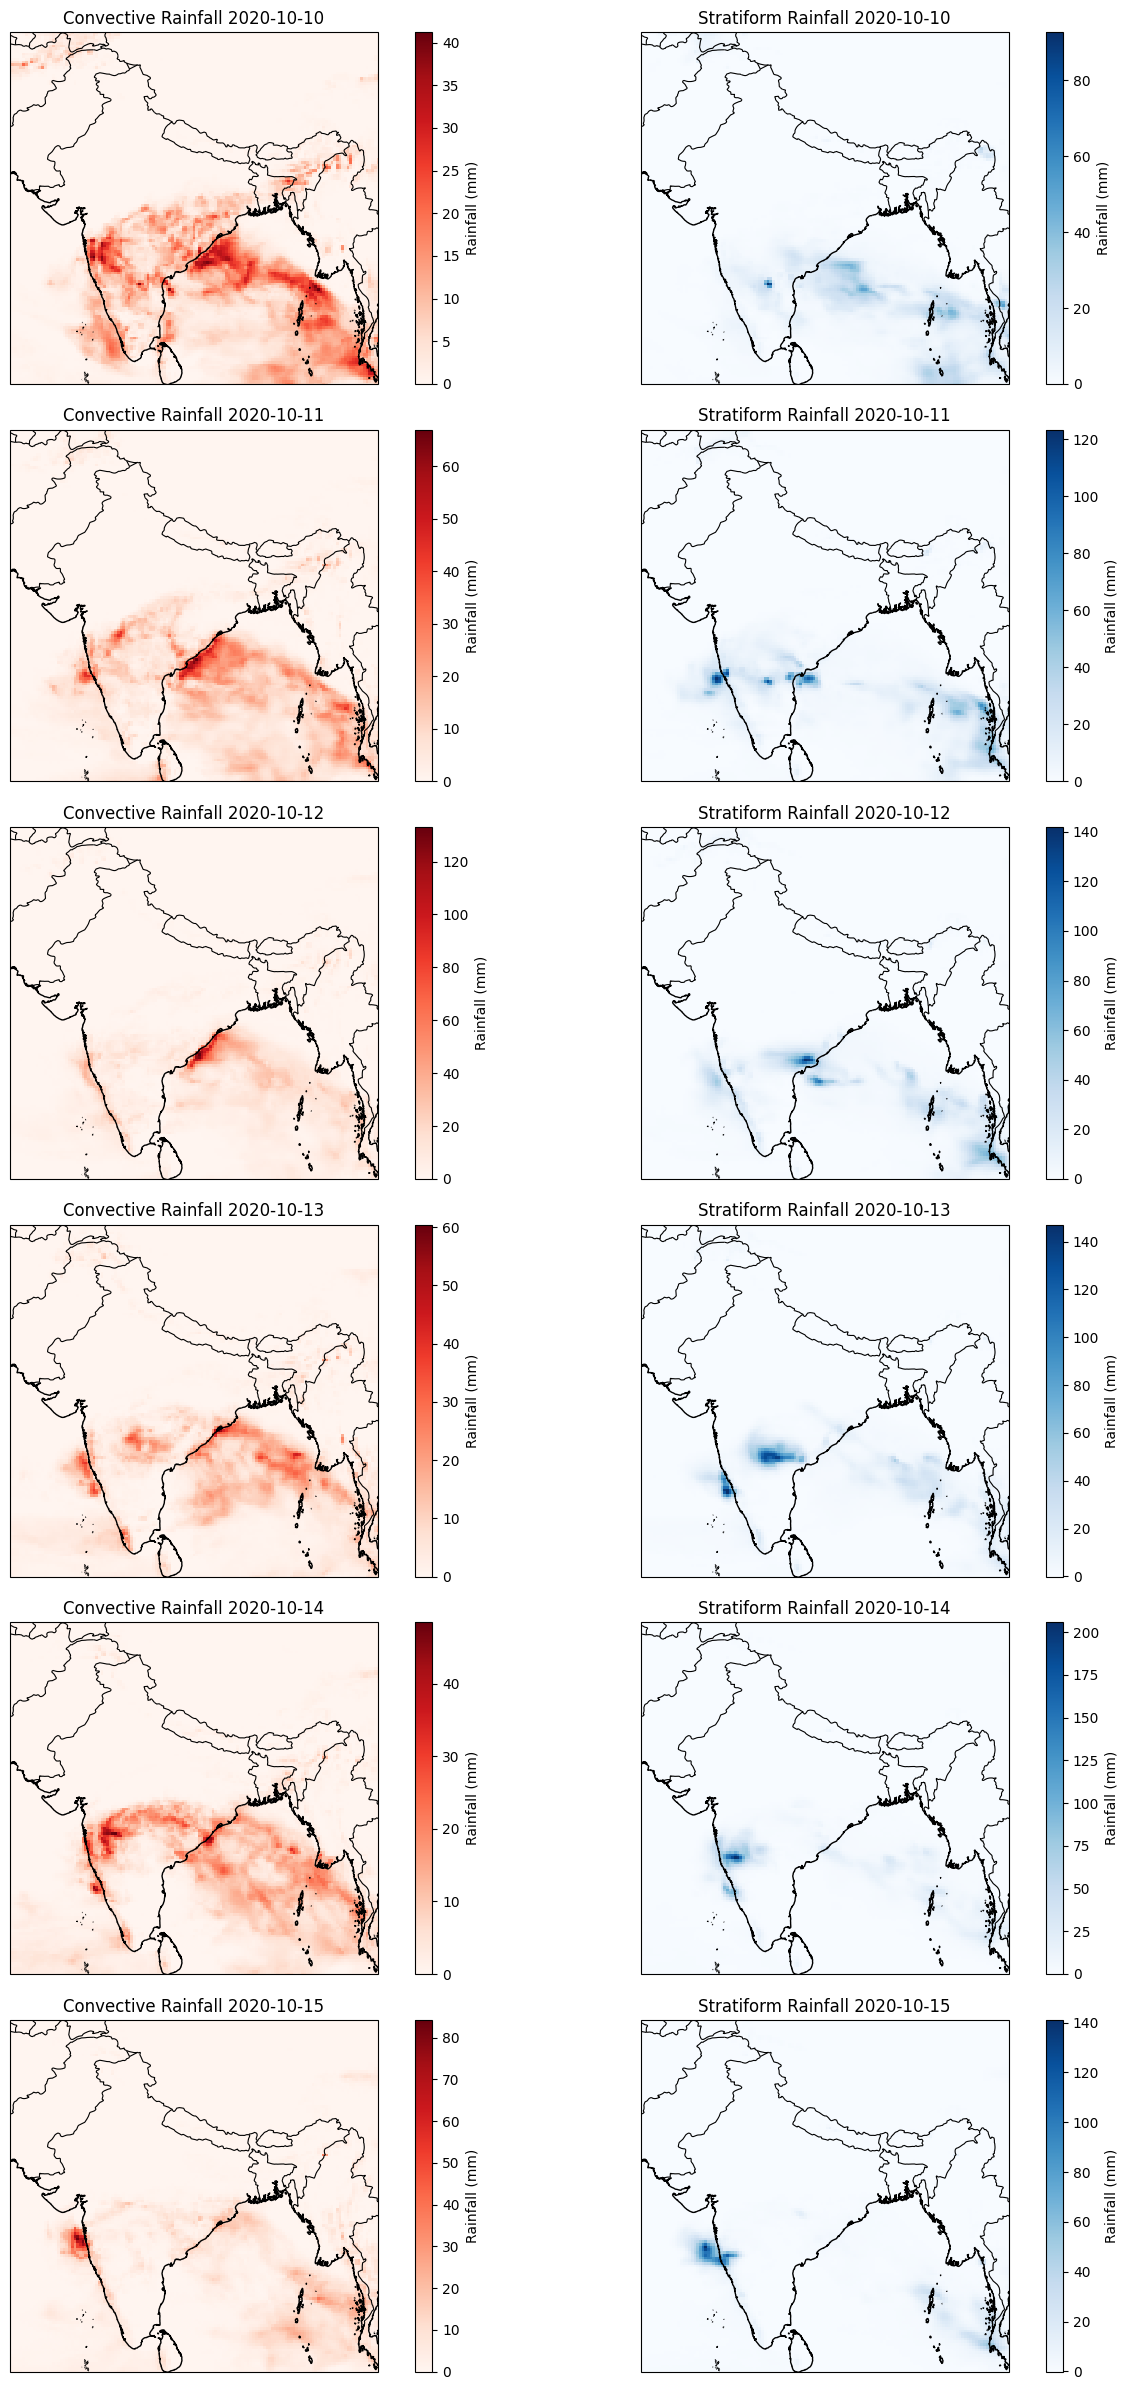

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

extent = [66, 100, 6, 38.5]

def plot_daily_rainfall(convective, stratiform, lons, lats, dates):
    n_days = len(dates)
    fig, axes = plt.subplots(n_days, 2, figsize=(14, 4 * n_days), subplot_kw={'projection': ccrs.PlateCarree()})

    for i, day in enumerate(dates):
        # Convective rainfall
        ax = axes[i, 0]
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.coastlines(resolution='10m')
        ax.add_feature(cfeature.BORDERS, linewidth=0.8)
        mesh = ax.pcolormesh(lons, lats, convective.sel(day=str(day.date())), cmap='Reds', shading='auto', transform=ccrs.PlateCarree())
        ax.set_title(f'Convective Rainfall {str(day.date())}')
        plt.colorbar(mesh, ax=ax, orientation='vertical', label='Rainfall (mm)')

        # Stratiform rainfall
        ax = axes[i, 1]
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.coastlines(resolution='10m')
        ax.add_feature(cfeature.BORDERS, linewidth=0.8)
        mesh = ax.pcolormesh(lons, lats, stratiform.sel(day=str(day.date())), cmap='Blues', shading='auto', transform=ccrs.PlateCarree())
        ax.set_title(f'Stratiform Rainfall {str(day.date())}')
        plt.colorbar(mesh, ax=ax, orientation='vertical', label='Rainfall (mm)')

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_daily_rainfall(convective_daily, stratiform_daily, lons, lats, dates)


In [11]:
# From accumulated dataset
convective = ds_accum['cp'].sum(dim='valid_time') * 1000  # mm
stratiform = (ds_accum['tp'] - ds_accum['cp']).sum(dim='valid_time') * 1000


In [12]:
# Using instantaneous variables
convective_mask = (
    (ds_inst['cbh'] > 2000) &          # High cloud bases
    (ds_inst['tcrw'] > 0.5) &          # Intense rainwater
    (ds_inst['ptype'].isin([1, 4]))    # Rain or mixed precip
)


In [13]:
convective_refined = convective.where(convective_mask)
stratiform_refined = stratiform.where(stratiform_mask)


NameError: name 'stratiform_mask' is not defined

In [ ]:
# Select first time step (modify index as needed)
convective_refined_2d = convective_refined.isel(valid_time=0)


In [ ]:
# For total rainfall over period
convective_refined_2d = convective_refined.sum(dim='valid_time')

# For daily average
convective_refined_2d = convective_refined.mean(dim='valid_time')


In [ ]:
# Use 2D data
convective_refined_2d.plot.pcolormesh(ax=ax, cmap='Reds', add_labels=False)


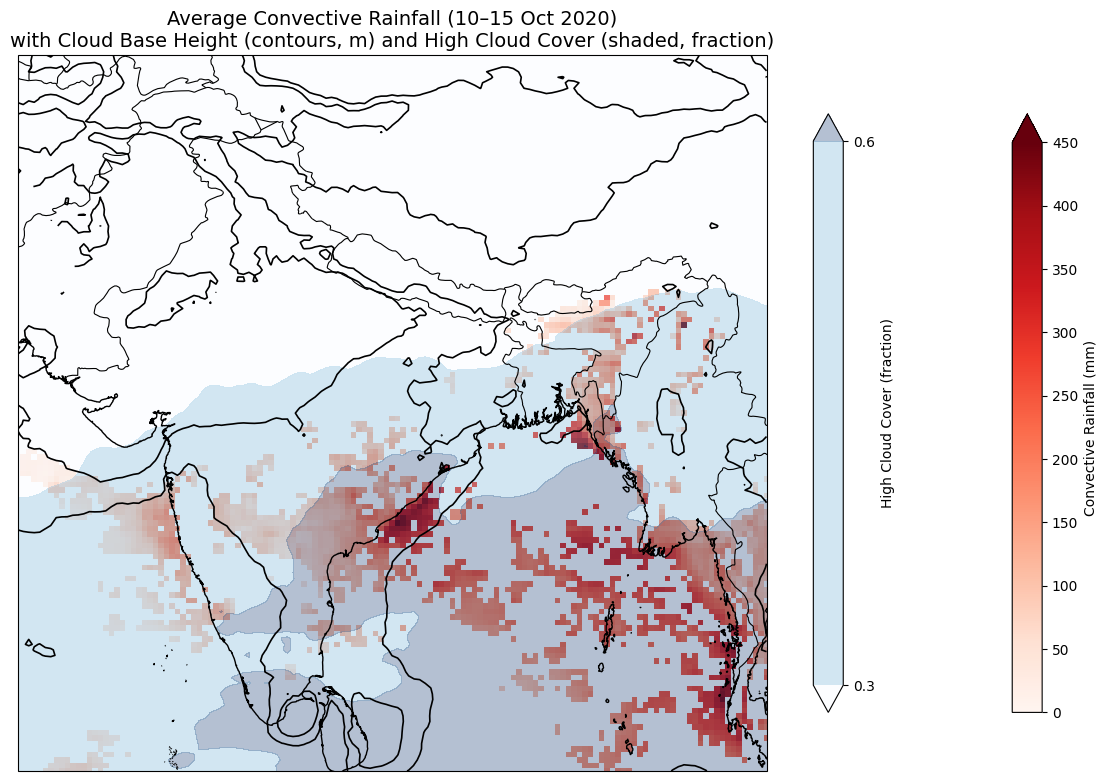

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Prepare 2D data as before
convective_refined_2d = convective_refined.mean(dim='valid_time')
cbh_2d = ds_inst['cbh'].mean(dim='valid_time')
hcc_2d = ds_inst['hcc'].mean(dim='valid_time')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# Plot convective rainfall with units in colorbar
rain_mesh = convective_refined_2d.plot.pcolormesh(
    ax=ax, cmap='Reds', add_labels=False, 
    vmin=0, vmax=450,  # Adjust as per your data range
    cbar_kwargs={'label': 'Convective Rainfall (mm)', 'shrink': 0.8})

# Overlay cloud base height contours (in meters)
cbh_contour = cbh_2d.plot.contour(
    ax=ax, levels=[1500, 3000], colors='black', linewidths=1.2, add_labels=False)

# Overlay high cloud cover (hcc) as shaded contours (fraction 0-1)
hcc_contour = hcc_2d.plot.contourf(
    ax=ax, levels=[0.3, 0.6], cmap='Blues', alpha=0.3, add_colorbar=True,
    cbar_kwargs={'label': 'High Cloud Cover (fraction)', 'shrink': 0.8})

# Map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.set_extent([66, 100, 6, 38.5], crs=ccrs.PlateCarree())

plt.title('Average Convective Rainfall (10–15 Oct 2020)\n'
          'with Cloud Base Height (contours, m) and High Cloud Cover (shaded, fraction)', fontsize=14)
plt.tight_layout()
plt.show()


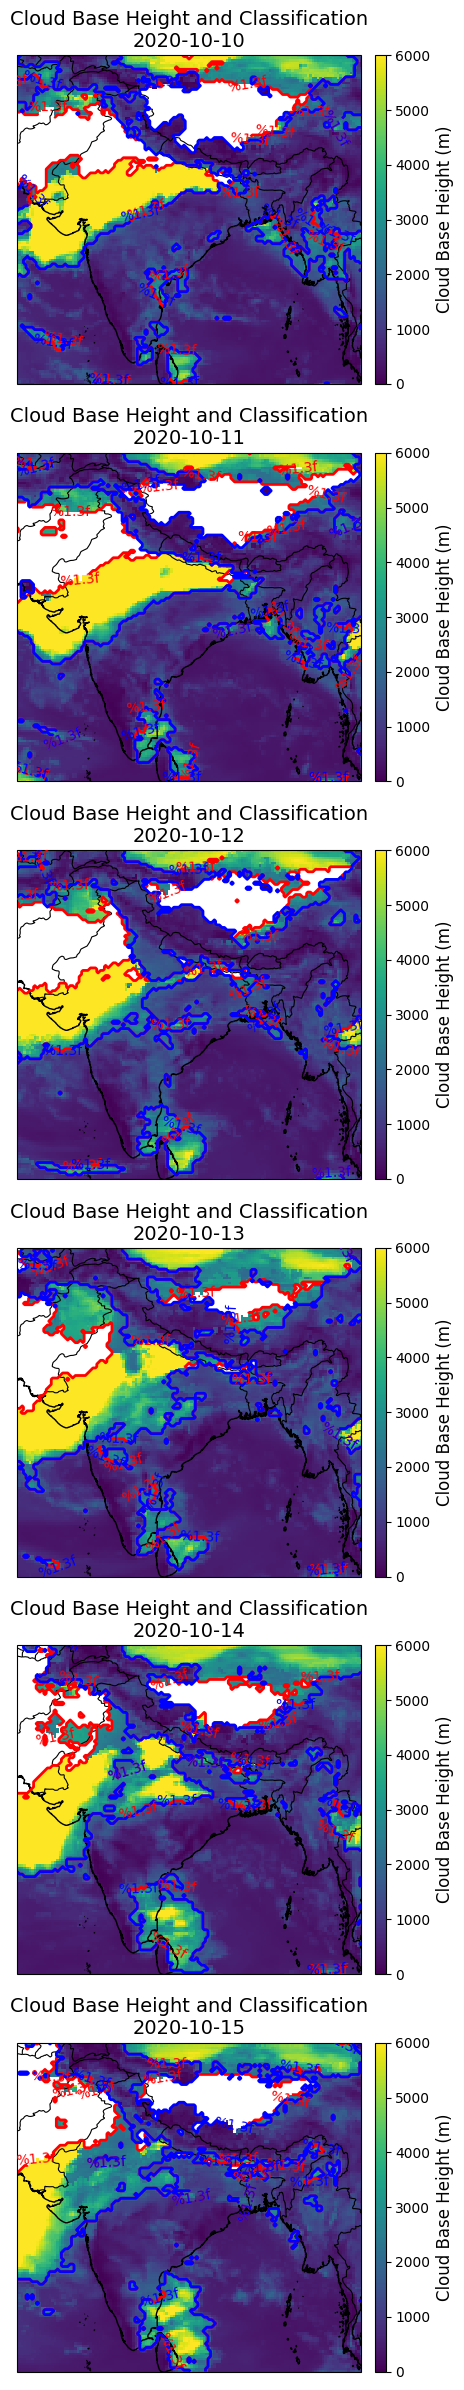

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd

# Assume ds_inst is your ERA5 instantaneous dataset with 'cbh', 'latitude', 'longitude', 'valid_time'
extent = [66, 100, 6, 38.5]

# Get unique days in your period
dates = pd.to_datetime(ds_inst['valid_time'].values).normalize()
unique_days = pd.date_range('2020-10-10', '2020-10-15')
n_days = len(unique_days)

fig, axes = plt.subplots(n_days, 1, figsize=(14, 4 * n_days), subplot_kw={'projection': ccrs.PlateCarree()})

for i, day in enumerate(unique_days):
    # Subset for the day
    day_mask = (dates == day)
    if not np.any(day_mask):
        continue  # Skip if no data for this day
    cbh_day = ds_inst['cbh'].isel(valid_time=day_mask).mean(dim='valid_time')

    ax = axes[i]
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linewidth=0.8)

    # Plot CBH values (in meters)
    mesh = ax.pcolormesh(
        ds_inst['longitude'], ds_inst['latitude'], cbh_day,
        cmap='viridis', shading='auto', vmin=0, vmax=6000,
        transform=ccrs.PlateCarree()
    )
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.01, aspect=30)
    cbar.set_label('Cloud Base Height (m)', fontsize=12)

    # Overlay convective and stratiform regions as contours
    convective_contour = ax.contour(
        ds_inst['longitude'], ds_inst['latitude'], cbh_day > 2000,
        levels=[0.5], colors='red', linewidths=2, transform=ccrs.PlateCarree()
    )
    stratiform_contour = ax.contour(
        ds_inst['longitude'], ds_inst['latitude'], cbh_day <= 2000,
        levels=[0.5], colors='blue', linewidths=2, transform=ccrs.PlateCarree()
    )
    ax.clabel(convective_contour, fmt={1: 'Convective (CBH>2000m)'}, fontsize=10, colors='red')
    ax.clabel(stratiform_contour, fmt={1: 'Stratiform (CBH≤2000m)'}, fontsize=10, colors='blue')

    ax.set_title(f'Cloud Base Height and Classification\n{day.strftime("%Y-%m-%d")}', fontsize=14)

plt.tight_layout()
plt.show()


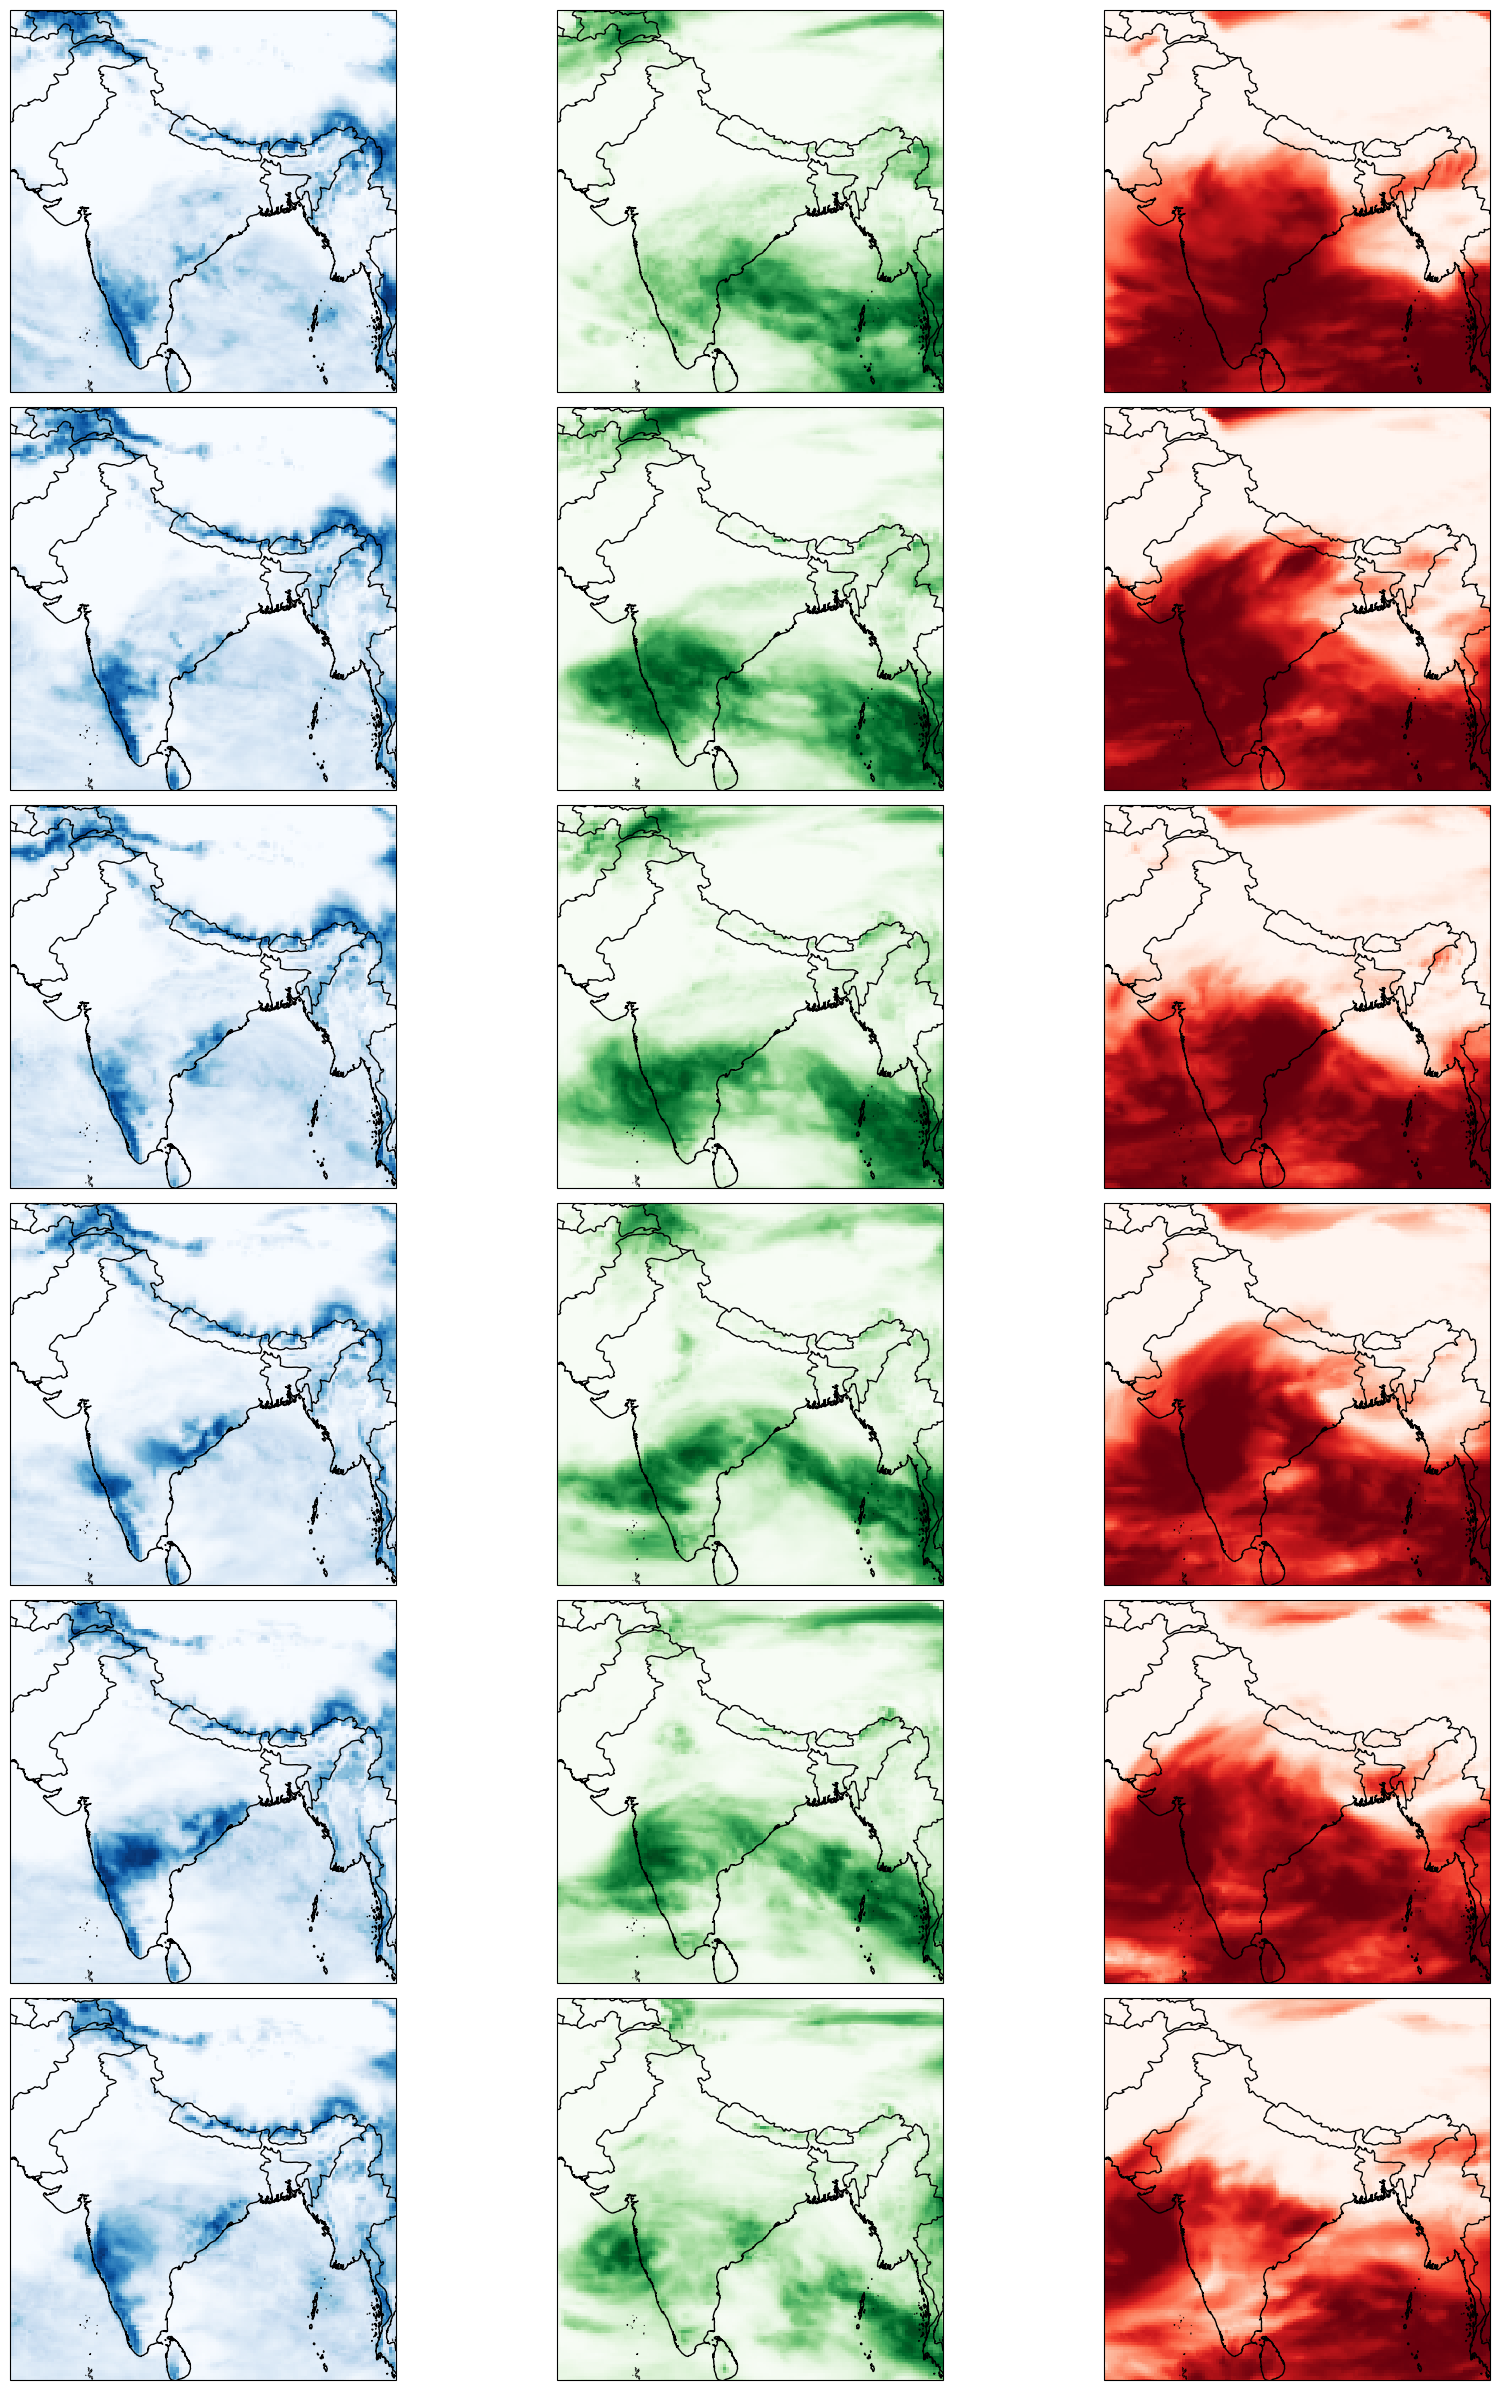

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Try loading real ERA5 data
try:
    ds_inst = xr.open_dataset("ERA5/data_stream-oper_stepType-instant.nc")
    # Process real data (from search result [1])
    sub_inst = ds_inst.sel(valid_time=slice('2020-10-10', '2020-10-15'))
    dates = pd.to_datetime(sub_inst.valid_time.values).normalize().unique()
    
    # Calculate daily means
    lcc_daily = sub_inst['lcc'].resample(valid_time='1D').mean()
    mcc_daily = sub_inst['mcc'].resample(valid_time='1D').mean()
    hcc_daily = sub_inst['hcc'].resample(valid_time='1D').mean()
    
    lats = sub_inst.latitude
    lons = sub_inst.longitude

except FileNotFoundError:
    print("ERA5 file not found. Using dummy data.")
    # Create dummy data without Cartopy dependency
    lats = np.linspace(6, 38.5, 137)
    lons = np.linspace(66, 100, 141)
    dates = pd.date_range('2020-10-10', '2020-10-15')
    
    lcc_daily = xr.DataArray(
        np.random.rand(len(dates), len(lats), len(lons)),
        dims=('day', 'latitude', 'longitude'),
        coords={'day': dates, 'latitude': lats, 'longitude': lons}
    )
    mcc_daily = lcc_daily * 0.8  # Medium clouds are typically less extensive
    hcc_daily = lcc_daily * 0.6  # High clouds even less

# Now plot (requires Cartopy)
try:
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    
    extent = [66, 100, 6, 38.5]
    n_days = len(dates)
    
    fig, axes = plt.subplots(n_days, 3, figsize=(18, 4*n_days), 
                            subplot_kw={'projection': ccrs.PlateCarree()})
    
    for i in range(n_days):
        # Low Cloud Cover
        axes[i,0].pcolormesh(lons, lats, lcc_daily[i], 
                            cmap='Blues', vmin=0, vmax=1,
                            transform=ccrs.PlateCarree())
        
        # Medium Cloud Cover
        axes[i,1].pcolormesh(lons, lats, mcc_daily[i], 
                            cmap='Greens', vmin=0, vmax=1,
                            transform=ccrs.PlateCarree())
        
        # High Cloud Cover
        axes[i,2].pcolormesh(lons, lats, hcc_daily[i], 
                            cmap='Reds', vmin=0, vmax=1,
                            transform=ccrs.PlateCarree())
        
        # Add map elements
        for col in [0, 1, 2]:
            axes[i,col].coastlines(resolution='10m')
            axes[i,col].add_feature(cfeature.BORDERS)
            axes[i,col].set_extent(extent)
    
    plt.tight_layout()
    plt.show()

except ModuleNotFoundError:
    print("Error: Cartopy not installed. Install with:")
    print("conda install -c conda-forge cartopy")


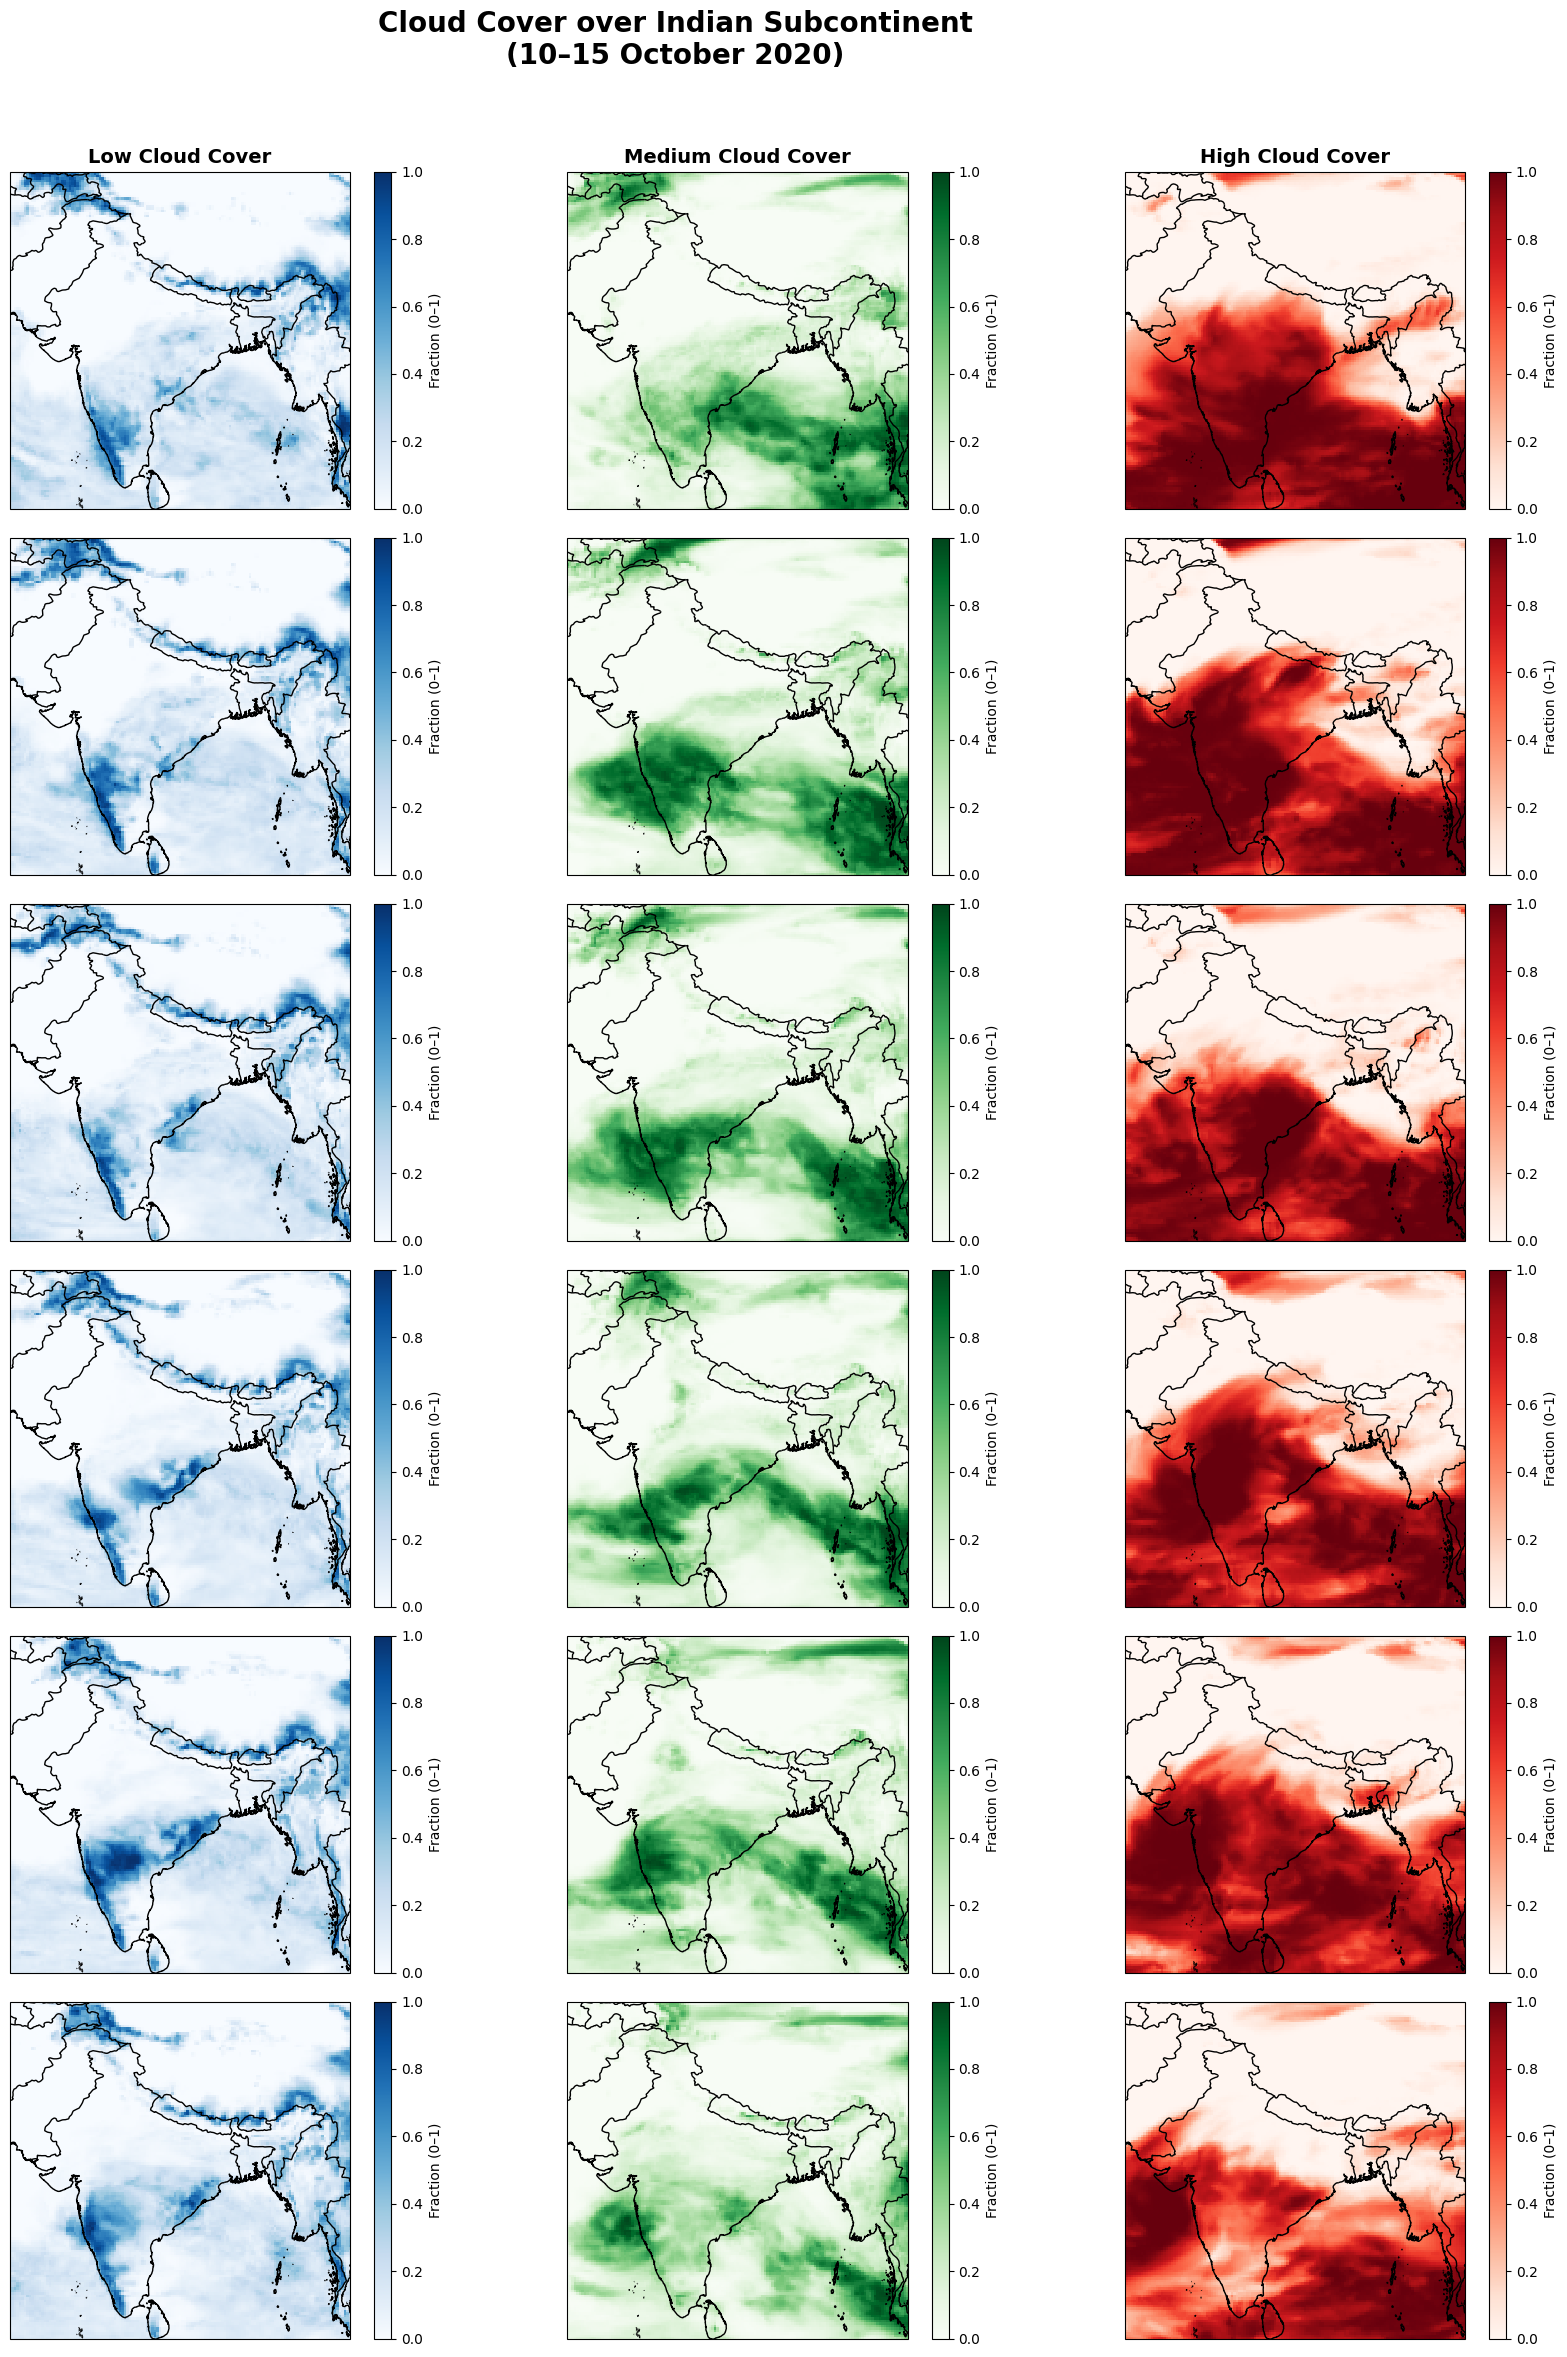

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Try loading real ERA5 data
try:
    ds_inst = xr.open_dataset("ERA5/data_stream-oper_stepType-instant.nc")
    sub_inst = ds_inst.sel(valid_time=slice('2020-10-10', '2020-10-15'))
    dates = pd.to_datetime(sub_inst.valid_time.values).normalize().unique()
    
    # Calculate daily means
    lcc_daily = sub_inst['lcc'].resample(valid_time='1D').mean()
    mcc_daily = sub_inst['mcc'].resample(valid_time='1D').mean()
    hcc_daily = sub_inst['hcc'].resample(valid_time='1D').mean()
    
    lats = sub_inst.latitude
    lons = sub_inst.longitude

except FileNotFoundError:
    print("ERA5 file not found. Using dummy data.")
    lats = np.linspace(6, 38.5, 137)
    lons = np.linspace(66, 100, 141)
    dates = pd.date_range('2020-10-10', '2020-10-15')
    
    lcc_daily = xr.DataArray(
        np.random.rand(len(dates), len(lats), len(lons)),
        dims=('day', 'latitude', 'longitude'),
        coords={'day': dates, 'latitude': lats, 'longitude': lons}
    )
    mcc_daily = lcc_daily * 0.8
    hcc_daily = lcc_daily * 0.6

# Plotting section
try:
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    
    extent = [66, 100, 6, 38.5]
    n_days = len(dates)
    
    fig, axes = plt.subplots(n_days, 3, figsize=(18, 4 * n_days), 
                             subplot_kw={'projection': ccrs.PlateCarree()})
    
    cloud_titles = ['Low Cloud Cover', 'Medium Cloud Cover', 'High Cloud Cover']
    cloud_data = [lcc_daily, mcc_daily, hcc_daily]
    cmaps = ['Blues', 'Greens', 'Reds']
    
    for i in range(n_days):
        for j in range(3):
            data = cloud_data[j]
            pcm = axes[i, j].pcolormesh(lons, lats, data[i], 
                                        cmap=cmaps[j], vmin=0, vmax=1,
                                        transform=ccrs.PlateCarree())
            axes[i, j].coastlines(resolution='10m')
            axes[i, j].add_feature(cfeature.BORDERS)
            axes[i, j].set_extent(extent)
            
            if i == 0:
                axes[i, j].set_title(cloud_titles[j], fontsize=14, weight='bold')
            
            cbar = fig.colorbar(pcm, ax=axes[i, j], orientation='vertical', fraction=0.035, pad=0.04)
            cbar.set_label('Fraction (0–1)', fontsize=10)
    
    fig.suptitle("Cloud Cover over Indian Subcontinent\n(10–15 October 2020)", fontsize=20, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for super title
    plt.show()

except ModuleNotFoundError:
    print("Error: Cartopy not installed. Install with:")
    print("conda install -c conda-forge cartopy")


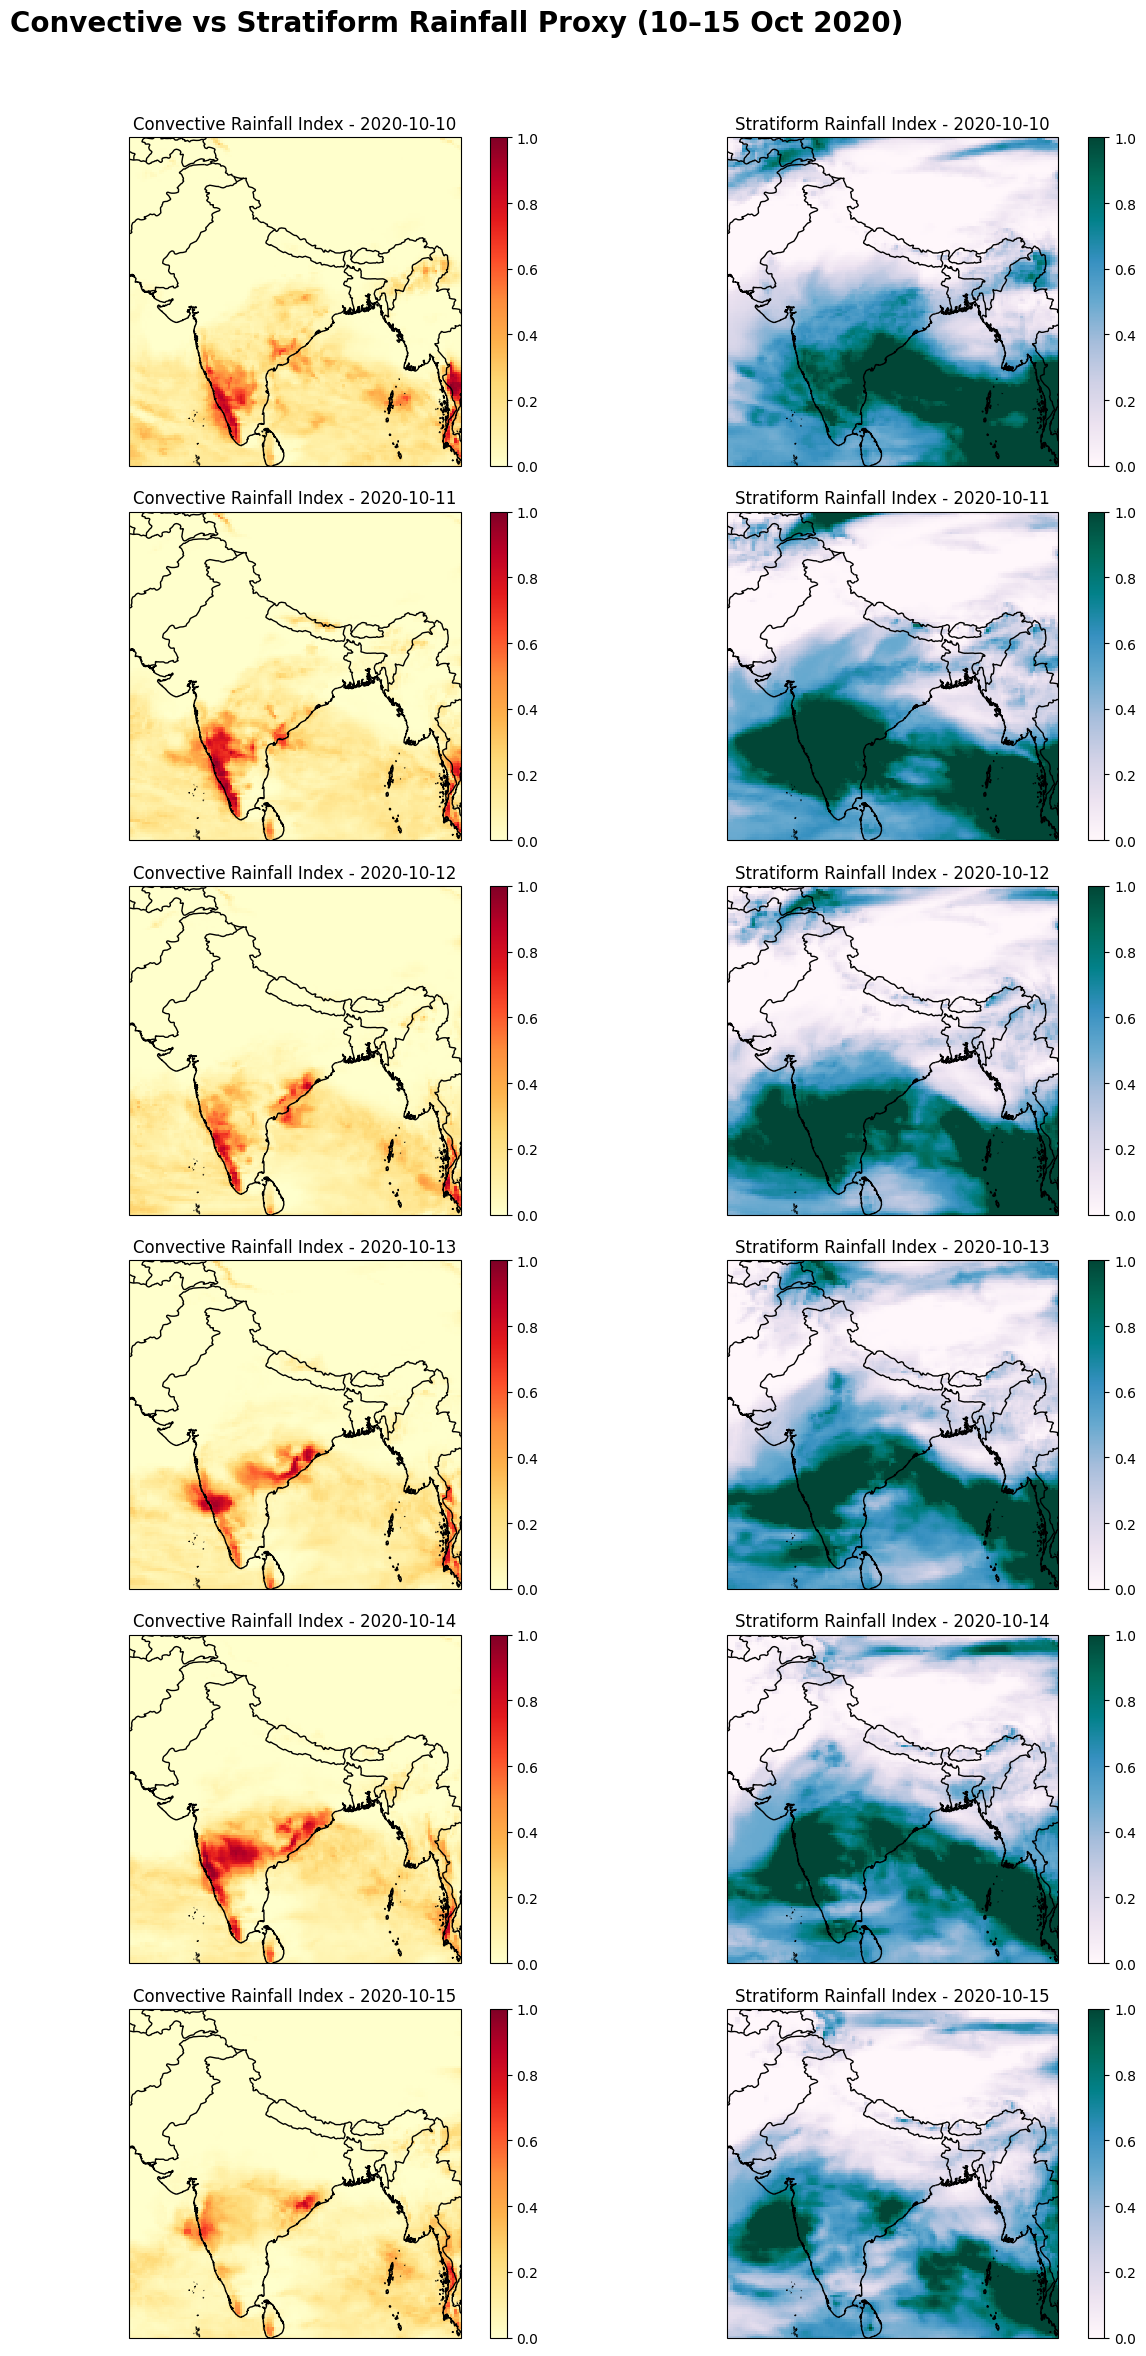

In [ ]:
# Calculate daily convective and stratiform indices
convective_index = lcc_daily * hcc_daily
stratiform_index = mcc_daily + 0.5 * hcc_daily

# Plotting with Cartopy
fig, axes = plt.subplots(n_days, 2, figsize=(14, 4 * n_days),
                         subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(n_days):
    # Convective Rainfall Proxy
    pcm1 = axes[i, 0].pcolormesh(lons, lats, convective_index[i],
                                 cmap='YlOrRd', vmin=0, vmax=1,
                                 transform=ccrs.PlateCarree())
    axes[i, 0].set_title(f"Convective Rainfall Index - {dates[i].date()}")
    axes[i, 0].coastlines(resolution='10m')
    axes[i, 0].add_feature(cfeature.BORDERS)
    axes[i, 0].set_extent(extent)
    fig.colorbar(pcm1, ax=axes[i, 0], orientation='vertical', fraction=0.035, pad=0.04)
    
    # Stratiform Rainfall Proxy
    pcm2 = axes[i, 1].pcolormesh(lons, lats, stratiform_index[i],
                                 cmap='PuBuGn', vmin=0, vmax=1,
                                 transform=ccrs.PlateCarree())
    axes[i, 1].set_title(f"Stratiform Rainfall Index - {dates[i].date()}")
    axes[i, 1].coastlines(resolution='10m')
    axes[i, 1].add_feature(cfeature.BORDERS)
    axes[i, 1].set_extent(extent)
    fig.colorbar(pcm2, ax=axes[i, 1], orientation='vertical', fraction=0.035, pad=0.04)

fig.suptitle("Convective vs Stratiform Rainfall Proxy (10–15 Oct 2020)", fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


🌧️ Estimating Convective and Stratiform Rainfall Using Cloud Cover
1. Convective Rainfall Estimation
Convective systems are typically:

Vertically developed (i.e., high cloud cover)

Occur with low-level and high-level clouds together (LCC + HCC)

Often intense but short-lived

🔹 Proxy index for convective rainfall:

Convective Index
=
LCC
×
HCC
Convective Index=LCC×HCC
You can compute this index daily to identify strong convective activity.

2. Stratiform Rainfall Estimation
Stratiform clouds are:

Layered and spread over a wide area

Mostly seen as medium and high clouds

Provide gentle, persistent rainfall

🔹 Proxy index for stratiform rainfall:

Stratiform Index
=
MCC
+
0.5
×
HCC
Stratiform Index=MCC+0.5×HCC

In [ ]:
# Load accumulated data (you already have this)
ds_accum = xr.open_dataset("ERA5/data_stream-oper_stepType-accum.nc")

# Select relevant time slice
sub_accum = ds_accum.sel(valid_time=slice('2020-10-10', '2020-10-15'))

# Calculate hourly rainfall by differencing
tp_hourly = sub_accum['tp'].diff(dim='valid_time')
crr_hourly = sub_accum['crr'].diff(dim='valid_time')
lsp_hourly = sub_accum['lsp'].diff(dim='valid_time')


KeyError: "No variable named 'crr'. Variables on the dataset include ['number', 'valid_time', 'latitude', 'longitude', 'expver', 'tp', 'cp']"